In [11]:
#Import Required Libraries
import pandas as pd
import numpy as np
import spacy
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

In [12]:
#  Load Dataset
df = pd.read_csv("Tweets.csv")  # Make sure this file is in your working directory
df = df[['text', 'airline_sentiment']]  # We'll use only relevant columns
df.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [13]:
# Text Preprocessing Function
def preprocess(text):
    doc = nlp(text.lower())  # Lowercase + Tokenize with spaCy
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    return " ".join(tokens)

# Apply preprocessing
df['clean_text'] = df['text'].apply(preprocess)
df[['text', 'clean_text']].head()


,text,clean_text
0,@VirginAmerica What @dhepburn said.,say
1,@VirginAmerica plus you've added commercials t...,plus add commercial experience tacky
2,@VirginAmerica I didn't today... Must mean I n...,today mean need trip
3,@VirginAmerica it's really aggressive to blast...,aggressive blast obnoxious entertainment guest...
4,@VirginAmerica and it's a really big bad thing...,big bad thing


In [14]:
#  Feature Extraction

# Word Count
df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))

# Character Count
df['char_count'] = df['clean_text'].apply(len)

# Avg Word Length
df['avg_word_len'] = df['char_count'] / (df['word_count'] + 1)

# Exclamation & Question Marks
df['exclam_count'] = df['text'].apply(lambda x: x.count('!'))
df['quest_count'] = df['text'].apply(lambda x: x.count('?'))

# Hashtags & Mentions
df['has_hashtag'] = df['text'].apply(lambda x: 1 if '#' in x else 0)
df['has_mention'] = df['text'].apply(lambda x: 1 if '@' in x else 0)

# Sentiment Polarity using TextBlob
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

df.head()


,text,airline_sentiment,clean_text,word_count,char_count,avg_word_len,exclam_count,quest_count,has_hashtag,has_mention,polarity
0,@VirginAmerica What @dhepburn said.,neutral,say,1,3,1.50,0,0,0,1,0.000000
1,@VirginAmerica plus you've added commercials t...,positive,plus add commercial experience tacky,5,36,6.00,0,0,0,1,0.000000
2,@VirginAmerica I didn't today... Must mean I n...,neutral,today mean need trip,4,20,4.00,1,0,0,1,-0.390625
3,@VirginAmerica it's really aggressive to blast...,negative,aggressive blast obnoxious entertainment guest...,9,71,7.10,0,0,0,1,0.006250
4,@VirginAmerica and it's a really big bad thing...,negative,big bad thing,3,13,3.25,0,0,0,1,-0.350000


In [15]:
#  TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=100)  # Limit features for simplicity
tfidf_matrix = tfidf.fit_transform(df['clean_text'])

# Convert to DataFrame and merge with main data
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
df = pd.concat([df.reset_index(drop=True), tfidf_df.reset_index(drop=True)], axis=1)

df.shape


(14640, 111)

/tmp/ipython-input-16-3266700483.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='airline_sentiment', palette='Set2')


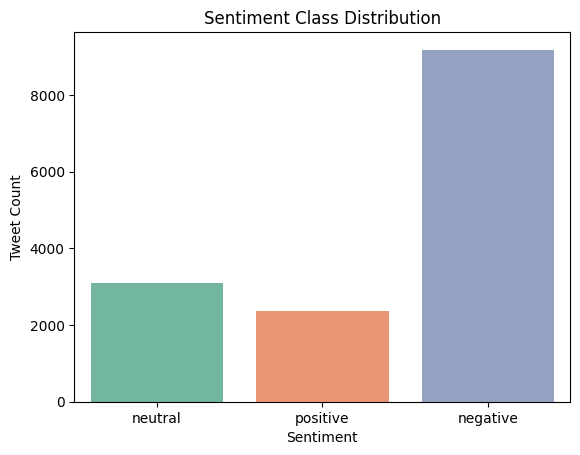

In [16]:
# Sentiment Distribution Visualization
sns.countplot(data=df, x='airline_sentiment', palette='Set2')
plt.title("Sentiment Class Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()


In [17]:
# Feature extraction (MUST RUN BEFORE CORRELATION/PLOTTING)
df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))
df['char_count'] = df['clean_text'].apply(len)
df['avg_word_len'] = df['char_count'] / (df['word_count'] + 1)
df['exclam_count'] = df['text'].apply(lambda x: x.count('!'))
df['quest_count'] = df['text'].apply(lambda x: x.count('?'))
df['has_hashtag'] = df['text'].apply(lambda x: 1 if '#' in x else 0)
df['has_mention'] = df['text'].apply(lambda x: 1 if '@' in x else 0)
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [ ]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=500)  # You can change the number as needed
tfidf_matrix = tfidf.fit_transform(df['clean_text'])

# Convert to DataFrame for analysis or modeling
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
print(tfidf_df.head())


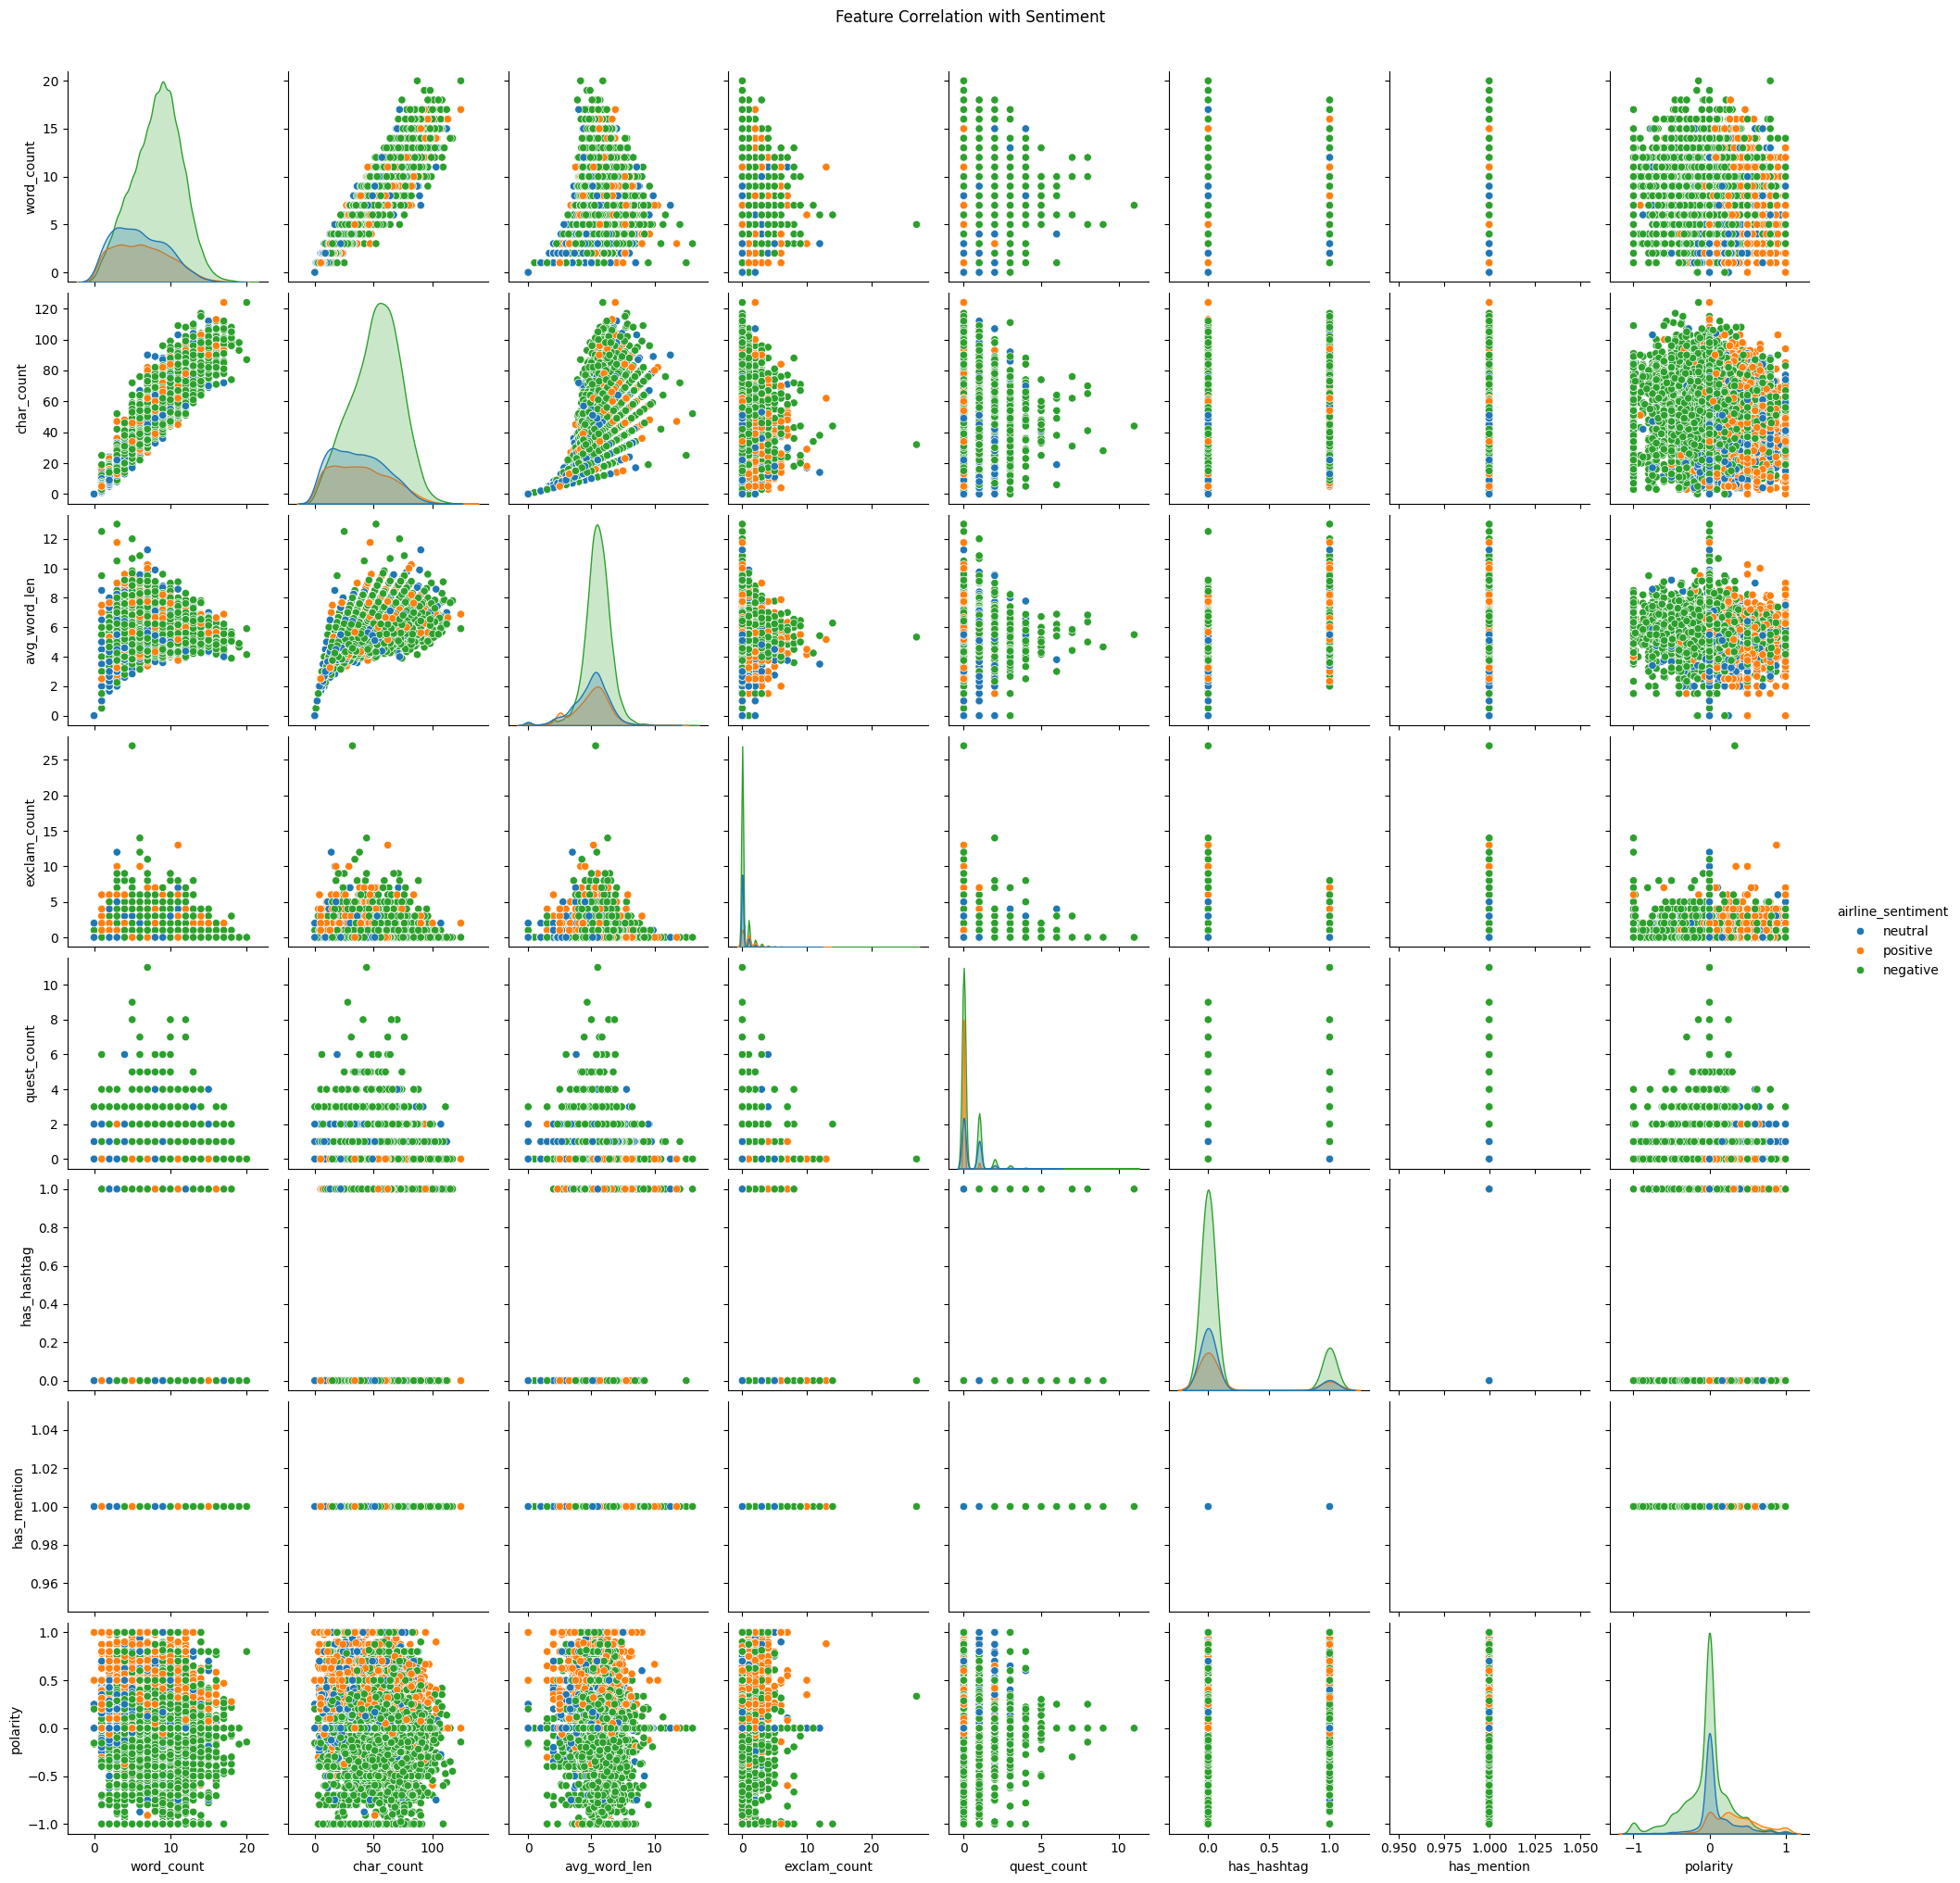

In [18]:
# 📊 Now draw pairplot to visualize how features relate to sentiment
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[numerical_features + ['airline_sentiment']], hue='airline_sentiment')
plt.suptitle("Feature Correlation with Sentiment", y=1.02)
plt.show()